## ANKET VERİLERİNDEN PARTİ TAHMİNİ

#### Veri seti insanlardan alınan cevaplardan oluşmaktadır. Basit bir ilk makine öğrenmesi örneğimdir. Toplam 16 sütun ve 60 satır vardır. Veri içeriği cinsiyet, yaş, bölge, eğitim, 10 adet soru ve parti'dir.

#### Amacımız diğer insanların verdiği cevaplara göre diğer kişilerin hangi partiyi desteklediğini tahmin edebilir miyiz? gibi soruların yanıtını bulmaktır.

## İÇİNDEKİLER

### 1- Kullanılacak Kütüphanelerin Projeye Dahil Edilmesi
### 2- Veri Kümesinin Yüklenmesi
### 3- Verilerin Görselleştirilmesi
#### 3.1- Yaş değişkeninin görselleştirilmesi
#### 3.2- Yaş dağılımı
#### 3.3- Bölge dağılımı
#### 3.3- Eğitim dağılımı
#### 3.3- Soruların dağılımı
### 4- Veri Ön İşleme
#### 4.1- Sütunların düzenlenmesi
#### 4.2- Cinsiyet, yaş, bölge, eğitim, sorular ve partilerin numaralndırılması
### 5- Model Oluşturma
#### 5.1- Train ve  Test verisini oluşturma
#### 5.2- Modellerin kurulması ve tahmin
##### 5.2.1- Naive bayes
##### 5.2.2- KNN
### 6- Modellerin Değerlendirilmesi
#### 6.1- R2 hata hesabı
#### 6.2- Hata kareler ortalaması hesabı

#### --------------------------------------------------------------------------------------------------------------

### Kullanıcalak kütüphanelerin projeye dahil edilmesi.

In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


### Veri setinin eklenmesi

In [170]:
data = pd.read_csv("data.csv")

In [171]:
data.head()

,Timestamp,Cinsiyet,Yas,Bolge,Egitim,soru1,soru2,soru3,soru4,soru5,soru6,soru7,soru8,soru9,soru10,parti
0,5/11/2018 1:26:14,Erkek,18-30,Marmara,Lisans,Hayır,Evet,Evet,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,IYI PARTI
1,5/11/2018 1:28:11,Erkek,18-30,Marmara,Lisans,Evet,Evet,Hayır,Evet,Hayır,Evet,Hayır,Evet,Hayır,Hayır,AKP
2,5/11/2018 1:28:26,Kadın,18-30,Marmara,Lisans,Hayır,Evet,Hayır,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,DIĞER
3,5/11/2018 1:30:18,Erkek,0-18,Marmara,Lise,Evet,Evet,Hayır,Evet,Hayır,Evet,Evet,Evet,Evet,Evet,IYI PARTI
4,5/11/2018 1:30:21,Erkek,18-30,Marmara,Ön Lisans,Hayır,Evet,Evet,Evet,Hayır,Hayır,Evet,Evet,Hayır,Hayır,IYI PARTI


### SORULAR

In [172]:
# soru1 : Türkiyenin ekonomik durumundan memnun musunuz?
# soru2 : Eğitim de reforma ihtiyaç var mı?
# soru3 : Özelleştirmeyi gidermek ister misiniz?
# soru4 : Devlet bazı suçlara idam cezası getirmeli mi?
# soru5 : Gazetecileri tarafsız buluyor musun?
# soru6 : Akşam 10 dan sonra alkol satma yasağını destekliyor musun?
# soru7 : Seküler (din-devlet ayrı gibi) bir devlet ister misin?
# soru8 : Kürtaj yasağını destekliyor musun?
#soru9 : Ohal'ın özgürlüklerini kısıtladığını düşünüyor musun?
#soru10 : Meclise yeni bir partinin girmesini ister misin?

In [173]:
data.head()

,Timestamp,Cinsiyet,Yas,Bolge,Egitim,soru1,soru2,soru3,soru4,soru5,soru6,soru7,soru8,soru9,soru10,parti
0,5/11/2018 1:26:14,Erkek,18-30,Marmara,Lisans,Hayır,Evet,Evet,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,IYI PARTI
1,5/11/2018 1:28:11,Erkek,18-30,Marmara,Lisans,Evet,Evet,Hayır,Evet,Hayır,Evet,Hayır,Evet,Hayır,Hayır,AKP
2,5/11/2018 1:28:26,Kadın,18-30,Marmara,Lisans,Hayır,Evet,Hayır,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,DIĞER
3,5/11/2018 1:30:18,Erkek,0-18,Marmara,Lise,Evet,Evet,Hayır,Evet,Hayır,Evet,Evet,Evet,Evet,Evet,IYI PARTI
4,5/11/2018 1:30:21,Erkek,18-30,Marmara,Ön Lisans,Hayır,Evet,Evet,Evet,Hayır,Hayır,Evet,Evet,Hayır,Hayır,IYI PARTI


## VERİ GÖRSELLEŞTİRME

### Veri setinin pasta dilimi ile görselleştirilmesi

### Ankete katılanların yaş dağılımı

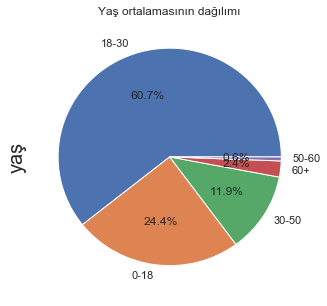

In [174]:
fig = plt.figure(figsize=(5,5))
data['Yas'].value_counts().plot(kind = 'pie',autopct='%.1f%%')
plt.ylabel("yaş", fontsize = 20)
plt.title("Yaş ortalamasının dağılımı");


### Ankete katılanların bölge dağılımı

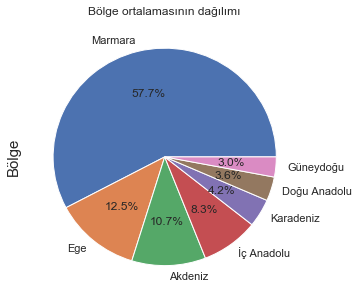

In [175]:
fig = plt.figure(figsize=(5,5))
data['Bolge'].value_counts().plot(kind = 'pie',autopct='%.1f%%')
plt.ylabel("Bölge", fontsize = 15)
plt.title("Bölge ortalamasının dağılımı");

### Ankete katılanların destekledikleri parti dağılımı

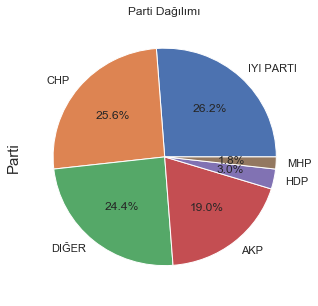

In [176]:
fig = plt.figure(figsize=(5,5))
data["parti"].value_counts().plot(kind = "pie", autopct = "%.1f%%")
plt.ylabel("Parti", fontsize = 15)
plt.title("Parti Dağılımı");

### Ankete katılanların cevap dağılımı

#### soru 1 Dağılımı

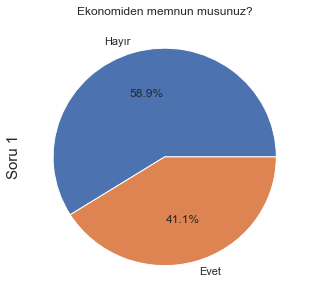

In [177]:
fig = plt.figure(figsize=(5,5))
data['soru1'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.ylabel("Soru 1", fontsize = 15)
plt.title("Ekonomiden memnun musunuz?");

#### Soru 2 Dağılımı

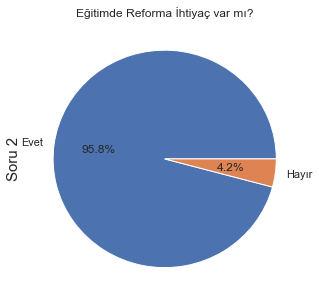

In [178]:
fig = plt.figure(figsize=(5,5))
data['soru2'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.ylabel("Soru 2", fontsize = 15)
plt.title("Eğitimde Reforma İhtiyaç var mı?");

#### Soru 3 Dağılımı

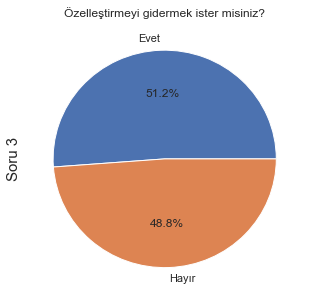

In [179]:
fig = plt.figure(figsize=(5,5))
data['soru3'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.ylabel("Soru 3", fontsize = 15)
plt.title("Özelleştirmeyi gidermek ister misiniz?");

#### Soru 4 Dağılımı

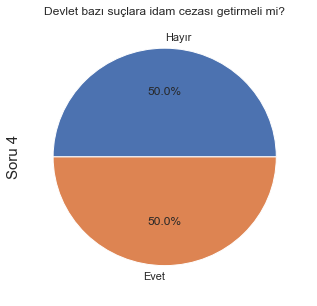

In [180]:
fig = plt.figure(figsize=(5,5))
data['soru4'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.ylabel("Soru 4", fontsize = 15)
plt.title("Devlet bazı suçlara idam cezası getirmeli mi?");

#### Soru 5 Dağılımı

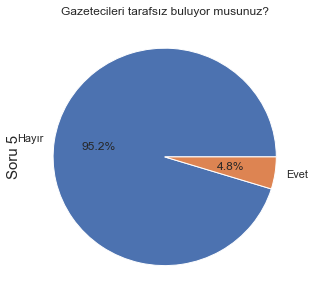

In [181]:
fig = plt.figure(figsize=(5,5))
data['soru5'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.ylabel("Soru 5", fontsize = 15)
plt.title("Gazetecileri tarafsız buluyor musunuz?");

#### Soru 6 Dağılımı

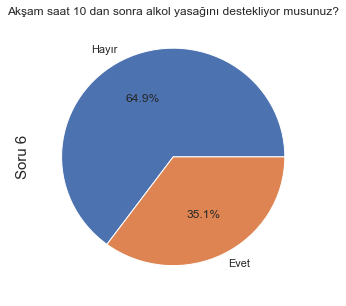

In [182]:
fig = plt.figure(figsize=(5,5))
data['soru6'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.ylabel("Soru 6", fontsize = 15)
plt.title("Akşam saat 10 dan sonra alkol yasağını destekliyor musunuz?");

#### Soru 7 Dağılımı

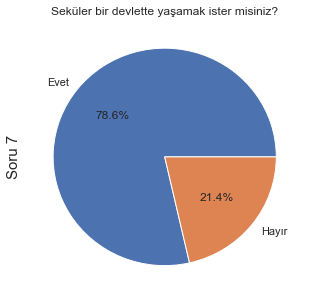

In [183]:
fig = plt.figure(figsize=(5,5))
data['soru7'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.ylabel("Soru 7", fontsize = 15)
plt.title("Seküler bir devlette yaşamak ister misiniz?");

#### Soru 8 Dağılımı

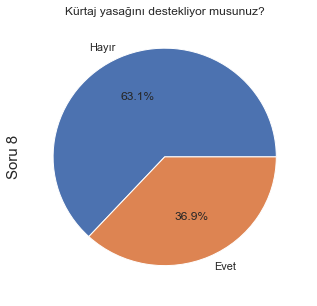

In [184]:
fig = plt.figure(figsize=(5,5))
data['soru8'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.ylabel("Soru 8", fontsize = 15)
plt.title("Kürtaj yasağını destekliyor musunuz?");

#### Soru 9 Dağılımı

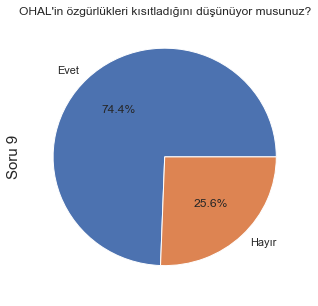

In [185]:
fig = plt.figure(figsize=(5,5))
data['soru9'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.ylabel("Soru 9", fontsize = 15)
plt.title("OHAL'in özgürlükleri kısıtladığını düşünüyor musunuz?");

#### Soru 10 Dağılımı

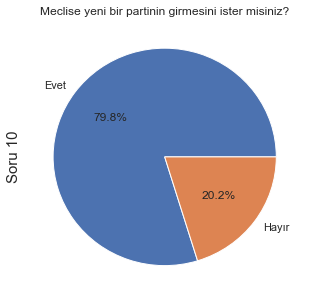

In [186]:
fig = plt.figure(figsize=(5,5))
data['soru10'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.ylabel("Soru 10", fontsize = 15)
plt.title("Meclise yeni bir partinin girmesini ister misiniz?");

## VERİ DÜZENLEME

#### Zaman sütunun temizlenmesi

In [187]:
del data["Timestamp"]

In [188]:
data.head()

,Cinsiyet,Yas,Bolge,Egitim,soru1,soru2,soru3,soru4,soru5,soru6,soru7,soru8,soru9,soru10,parti
0,Erkek,18-30,Marmara,Lisans,Hayır,Evet,Evet,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,IYI PARTI
1,Erkek,18-30,Marmara,Lisans,Evet,Evet,Hayır,Evet,Hayır,Evet,Hayır,Evet,Hayır,Hayır,AKP
2,Kadın,18-30,Marmara,Lisans,Hayır,Evet,Hayır,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,DIĞER
3,Erkek,0-18,Marmara,Lise,Evet,Evet,Hayır,Evet,Hayır,Evet,Evet,Evet,Evet,Evet,IYI PARTI
4,Erkek,18-30,Marmara,Ön Lisans,Hayır,Evet,Evet,Evet,Hayır,Hayır,Evet,Evet,Hayır,Hayır,IYI PARTI


### Veri setinde yaş sütununu belirli aralıklar ile bölerek numaralandırarak sınırlandırıyoruz.

In [189]:
map_data = [data]
yas_mapping = {"0-18" : 1, "18-30" : 2, "30-50" : 3, "50-60" : 4, "60+" : 5 }
for dataset in map_data:
    dataset["Yas"] = dataset["Yas"].map(yas_mapping)
    dataset["Yas"] = dataset["Yas"].fillna(0)
    


In [190]:
data.head()

,Cinsiyet,Yas,Bolge,Egitim,soru1,soru2,soru3,soru4,soru5,soru6,soru7,soru8,soru9,soru10,parti
0,Erkek,2,Marmara,Lisans,Hayır,Evet,Evet,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,IYI PARTI
1,Erkek,2,Marmara,Lisans,Evet,Evet,Hayır,Evet,Hayır,Evet,Hayır,Evet,Hayır,Hayır,AKP
2,Kadın,2,Marmara,Lisans,Hayır,Evet,Hayır,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,DIĞER
3,Erkek,1,Marmara,Lise,Evet,Evet,Hayır,Evet,Hayır,Evet,Evet,Evet,Evet,Evet,IYI PARTI
4,Erkek,2,Marmara,Ön Lisans,Hayır,Evet,Evet,Evet,Hayır,Hayır,Evet,Evet,Hayır,Hayır,IYI PARTI


### Veri setinde bölge sütununu bölgelere göre numaralandırarak sınırlandırıyoruz.

In [191]:
map_data = [data]
bolge_mapping = {"Marmara" : 1, "Ege" : 2, "Karadeniz" : 3, "Akdeniz" : 4, "İç Anadolu" : 5 , "Doğu Anadolu" : 6, "Güneydoğu" : 7} 
for dataset in map_data:
    dataset["Bolge"] = dataset["Bolge"].map(bolge_mapping)
    dataset["Bolge"] = dataset["Bolge"].fillna(0)
    
data.head()

,Cinsiyet,Yas,Bolge,Egitim,soru1,soru2,soru3,soru4,soru5,soru6,soru7,soru8,soru9,soru10,parti
0,Erkek,2,1,Lisans,Hayır,Evet,Evet,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,IYI PARTI
1,Erkek,2,1,Lisans,Evet,Evet,Hayır,Evet,Hayır,Evet,Hayır,Evet,Hayır,Hayır,AKP
2,Kadın,2,1,Lisans,Hayır,Evet,Hayır,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,DIĞER
3,Erkek,1,1,Lise,Evet,Evet,Hayır,Evet,Hayır,Evet,Evet,Evet,Evet,Evet,IYI PARTI
4,Erkek,2,1,Ön Lisans,Hayır,Evet,Evet,Evet,Hayır,Hayır,Evet,Evet,Hayır,Hayır,IYI PARTI


### Veri setinde Eğitim sütununu numaralandırarak sınıflandırıyoruz..

In [192]:
map_data = [data]
egitim_mapping = {"İlkokul" : 1, "Ortaokul" : 2, "Lise" : 3, "Ön Lisans" : 4, "Lisans" : 5, "Lisans Üstü" : 6}
for dataset in map_data:
    dataset["Egitim"] = dataset["Egitim"].map(egitim_mapping)
    dataset["Egitim"] = dataset["Egitim"].fillna(0)

data.head()

,Cinsiyet,Yas,Bolge,Egitim,soru1,soru2,soru3,soru4,soru5,soru6,soru7,soru8,soru9,soru10,parti
0,Erkek,2,1,5,Hayır,Evet,Evet,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,IYI PARTI
1,Erkek,2,1,5,Evet,Evet,Hayır,Evet,Hayır,Evet,Hayır,Evet,Hayır,Hayır,AKP
2,Kadın,2,1,5,Hayır,Evet,Hayır,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,DIĞER
3,Erkek,1,1,3,Evet,Evet,Hayır,Evet,Hayır,Evet,Evet,Evet,Evet,Evet,IYI PARTI
4,Erkek,2,1,4,Hayır,Evet,Evet,Evet,Hayır,Hayır,Evet,Evet,Hayır,Hayır,IYI PARTI


### Veri setinde cinsiyet sütununu numaralandırarak sınıflandırıyoruz.

In [193]:
map_data = [data]
cinsiyet_mapping = {"Erkek" : 1, "Kadın" : 0}

for dataset in map_data:
    dataset["Cinsiyet"] = dataset["Cinsiyet"].map(cinsiyet_mapping)

data.head()

,Cinsiyet,Yas,Bolge,Egitim,soru1,soru2,soru3,soru4,soru5,soru6,soru7,soru8,soru9,soru10,parti
0,1,2,1,5,Hayır,Evet,Evet,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,IYI PARTI
1,1,2,1,5,Evet,Evet,Hayır,Evet,Hayır,Evet,Hayır,Evet,Hayır,Hayır,AKP
2,0,2,1,5,Hayır,Evet,Hayır,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,DIĞER
3,1,1,1,3,Evet,Evet,Hayır,Evet,Hayır,Evet,Evet,Evet,Evet,Evet,IYI PARTI
4,1,2,1,4,Hayır,Evet,Evet,Evet,Hayır,Hayır,Evet,Evet,Hayır,Hayır,IYI PARTI


#### Column Name Değiştirme

In [194]:
#data.rename(columns = {"Cinsiyet" : "Sex"})

### Veri setinde parti sütununu numaralandırarak sınıflandırıyoruz.

In [195]:
map_data = [data]
parti_mapping = {"AKP" : 1, "CHP" : 2, "IYI PARTI" : 3, "MHP" : 4, "HDP" : 5, "DIĞER" : 6}

for dataset in map_data:
    dataset["parti"] = dataset["parti"].map(parti_mapping)
    dataset["parti"] = dataset["parti"].fillna(0)
    
data.head()

,Cinsiyet,Yas,Bolge,Egitim,soru1,soru2,soru3,soru4,soru5,soru6,soru7,soru8,soru9,soru10,parti
0,1,2,1,5,Hayır,Evet,Evet,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,3
1,1,2,1,5,Evet,Evet,Hayır,Evet,Hayır,Evet,Hayır,Evet,Hayır,Hayır,1
2,0,2,1,5,Hayır,Evet,Hayır,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,6
3,1,1,1,3,Evet,Evet,Hayır,Evet,Hayır,Evet,Evet,Evet,Evet,Evet,3
4,1,2,1,4,Hayır,Evet,Evet,Evet,Hayır,Hayır,Evet,Evet,Hayır,Hayır,3


### Soru cevaplarında ki EVET-HAYIR kısımlarını numaralandırarak sınıflandırıyoruz.

In [196]:
map_data = [data]
soru_mapping = {"Evet" : 1, "Hayır" : 0}

for dataset in map_data:
    dataset["soru1"] = dataset["soru1"].map(soru_mapping)
    
data.head()


,Cinsiyet,Yas,Bolge,Egitim,soru1,soru2,soru3,soru4,soru5,soru6,soru7,soru8,soru9,soru10,parti
0,1,2,1,5,0,Evet,Evet,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,3
1,1,2,1,5,1,Evet,Hayır,Evet,Hayır,Evet,Hayır,Evet,Hayır,Hayır,1
2,0,2,1,5,0,Evet,Hayır,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,6
3,1,1,1,3,1,Evet,Hayır,Evet,Hayır,Evet,Evet,Evet,Evet,Evet,3
4,1,2,1,4,0,Evet,Evet,Evet,Hayır,Hayır,Evet,Evet,Hayır,Hayır,3


In [197]:
map_data = [data]
soru_mapping = {"Evet" : 1, "Hayır" : 0}

for dataset in map_data:
    dataset["soru2"] = dataset["soru2"].map(soru_mapping)
    
for dataset in map_data:
    dataset["soru3"] = dataset["soru3"].map(soru_mapping)
    
for dataset in map_data:
    dataset["soru4"] = dataset["soru4"].map(soru_mapping)
    
for dataset in map_data:
    dataset["soru5"] = dataset["soru5"].map(soru_mapping)
    
for dataset in map_data:
    dataset["soru6"] = dataset["soru6"].map(soru_mapping)
    
for dataset in map_data:
    dataset["soru7"] = dataset["soru7"].map(soru_mapping)
    
for dataset in map_data:
    dataset["soru8"] = dataset["soru8"].map(soru_mapping)
    
for dataset in map_data:
    dataset["soru9"] = dataset["soru9"].map(soru_mapping)
    
for dataset in map_data:
    dataset["soru10"] = dataset["soru10"].map(soru_mapping)
    
data.head()

,Cinsiyet,Yas,Bolge,Egitim,soru1,soru2,soru3,soru4,soru5,soru6,soru7,soru8,soru9,soru10,parti
0,1,2,1,5,0,1,1,0,0,0,1,0,1,1,3
1,1,2,1,5,1,1,0,1,0,1,0,1,0,0,1
2,0,2,1,5,0,1,0,0,0,0,1,0,1,1,6
3,1,1,1,3,1,1,0,1,0,1,1,1,1,1,3
4,1,2,1,4,0,1,1,1,0,0,1,1,0,0,3


# Model Oluşturma

### Algoritmaları kullanıp en uygununu seçeceğiz. Veri setimiz az olduğu için hepsini eğitim seti olarak kullanacağız. Test verisini kendimiz oluşturacağız.

## Naive Bayes

#### Eğitim setimizi X ve y olarak ayırıyoruz ve bağımlı, bağımsız değişkeni ayırarak X ve y değişkenine atıyoruz. 

In [198]:
X = data.drop("parti", axis = 1) # BAĞIMSIZ DEĞİŞKENLER
y = data["parti"] # BAĞIMLI DEĞİŞKEN

#### Modelimizi oluşturuyoruz.

In [199]:
nv = GaussianNB()

#### Modelimizi bağımlı ve bağımsız değişken ile ayırdıklarımızla eğitiyoruz.

In [200]:
model_nv = nv.fit(X,y)

#### Soruların cevaplarına göre kendi test verimizi oluşturup dataframe çevirerek transpozunu aldık.

In [201]:
test_verim =  [[1],[2],[3],[5],[0],[0],[0],[1],[1],[1],[0],[1],[1],[1]]
test_verim = pd.DataFrame(test_verim).T

#### Tahmin işlemi yapıyoruz.

In [202]:
nv.predict(test_verim)

array([1], dtype=int64)

### Hata Hesabı

#### R2 HATA HESABI

#### r2 hata hesabı ile eğitim hatamızı buluyoruz.

In [203]:
-(cross_val_score(model_nv, X, y, cv=5, scoring="r2").mean())

C:\Users\asel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


1.3580958999376045

#### HATA KARELER ORTALAMASI

#### Hata kareler ortalaması ile eğitim hatamızı buluyoruz.

In [204]:
valide_sonuc_nv = np.sqrt(-cross_val_score(model_nv, X, y, cv=5, scoring="neg_mean_squared_error")).mean()
valide_sonuc_nv

C:\Users\asel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


2.7908026808334374

## Knn

#### Eğitim setimizi X ve y olarak ayırıyoruz ve bağımlı, bağımsız değişkeni ayırarak X ve y değişkenine atıyoruz. 

In [205]:
X = data.drop("parti", axis = 1) # BAĞIMSIZ DEĞİŞKENLER
y = data["parti"] # BAĞIMLI DEĞİŞKEN

#### Modelimizi oluşturuyoruz.  Komşu sayımızı da 3 olarak belirliyoruz.

In [206]:
knn = KNeighborsClassifier(n_neighbors=3)

#### Modelimizi bağımlı ve bağımsız değişken ile ayırdıklarımızla eğitiyoruz.

In [207]:
model_knn = knn.fit(X,y)

#### Modelimizi bağımlı ve bağımsız değişken ile ayırdıklarımızla eğitiyoruz.

In [208]:
test_verim = [[1],[2],[3],[5],[0],[0],[0],[1],[1],[1],[0],[1],[1],[1]]
test_verim = pd.DataFrame(test_verim).T

#### Tahmin işlemi yapıyoruz.

In [209]:
knn.predict(test_verim)

array([3], dtype=int64)

### Hata Hesabı

#### R2 HATA HESABI

#### r2 hata hesabı ile eğitim hatamızı buluyoruz.

In [210]:
-(cross_val_score(model_knn, X, y, cv=5, scoring="r2").mean())

C:\Users\asel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.6379139060635028

#### HATA KARELER ORTALAMASI

#### Hata kareler ortalaması ile eğitim hatamızı buluyoruz.

In [211]:
valide_sonuc_knn = np.sqrt(-cross_val_score(model_knn, X, y, cv=5, scoring="neg_mean_squared_error")).mean()
valide_sonuc_knn

C:\Users\asel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


2.328670812662972

## Random Forest

#### Eğitim setimizi X ve y olarak ayırıyoruz ve bağımlı, bağımsız değişkeni ayırarak X ve y değişkenine atıyoruz. 

In [212]:
X = data.drop("parti", axis = 1) # BAĞIMSIZ DEĞİŞKENLER
y = data["parti"] # BAĞIMLI DEĞİŞKEN

#### Modelimizi oluşturuyoruz.  Komşu sayımızı da 3 olarak belirliyoruz.

In [213]:
ran_forest = RandomForestClassifier()

#### Modelimizi bağımlı ve bağımsız değişken ile ayırdıklarımızla eğitiyoruz.

In [214]:
model_rforest = ran_forest.fit(X,y)

#### Modelimizi bağımlı ve bağımsız değişken ile ayırdıklarımızla eğitiyoruz.

In [215]:
test_verim = [[1],[2],[3],[5],[0],[0],[0],[1],[1],[1],[0],[1],[1],[1]]
test_verim = pd.DataFrame(test_verim).T

#### Tahmin işlemi yapıyoruz.

In [216]:
ran_forest.predict(test_verim)

array([1], dtype=int64)

### Hata Hesabı

#### R2 HATA HESABI

#### r2 hata hesabı ile eğitim hatamızı buluyoruz.

In [217]:
-(cross_val_score(model_rforest, X, y, cv=10, scoring="r2").mean())

C:\Users\asel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.3924934202610807

#### HATA KARELER ORTALAMASI

#### Hata kareler ortalaması ile eğitim hatamızı buluyoruz.

In [218]:
valide_sonuc_random = np.sqrt(-cross_val_score(model_rforest, X, y, cv=5, scoring="neg_mean_squared_error")).mean()
valide_sonuc_random

C:\Users\asel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


2.245749627089584

# Sonuçların Görselleştirilmesi

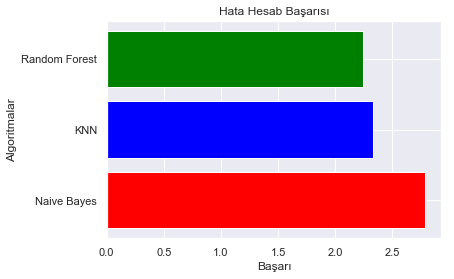

In [219]:
y = [valide_sonuc_nv, valide_sonuc_knn, valide_sonuc_random]
x_labels = ['Naive Bayes', 'KNN', 'Random Forest']
x_pos = np.arange(len(y))

plt.barh(x_pos,y,color = ["red","blue","green"])

plt.title("Hata Hesab Başarısı")

plt.yticks(x_pos,x_labels);

plt.ylabel("Algoritmalar")
plt.xlabel("Başarı")
plt.show();

### Yapılan değerlendirme sonucunda Naive Bayes en yüksek değeri vermiştir. En az değeri Random Forest olduğu için en uygun algoritma olmuştur.

## --------------------------------------------------------------------------

## Yapmış olduğumuz bu makine öğrenmesi örneğinde veri setimiz çok kısıtlı olduğu için çok doğru sonuçlar alamadık. Kullandığımız bu iki algoritma arasında Random Forest algoritması daha az hata verdiği için tercih edilir. Ve bu şekilde belli sorular ile insanların hangi partiye oy vereceğinin tahmini yapılır.